# Association Rules
## Example with the [__Online Retail__](https://archive.ics.uci.edu/ml/datasets/online+retail) dataset, from UCI
The file is a **transactional database**. Each transaction is represented by several lines (one for each item in the transaction) characterised by the same `InvoiceNo`. In order to discover the association rules we will generate a new file, we will call it `basket` with one row for each transaction and one column for each item of the entire dataset. The content of the row will be 1 for each column corresponding to an item contained in the transaction, 0 for the other columns.

In order to obtain this final representation we will need some **cleaning** operation, simply filtering the input rows and doing some data transformation, then a **grouping** operation to generte the new data structure, with the _Pandas_ functions `groupby` and `unstack`

In [1]:
# this installs a new library in your computer, execute this only the first time, then comment it
# ! pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:0031m9.1 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

Upload the file `'Online-Retail-France.xlsx'`. It is a MS Excel file, you can read it with the Pandas' function `read_excel`.

Inspect its content. It is a transactional database where the role of transaction identifier is played by the column `InvoiceNo` and the items are in the column `Description`.

Insert a cell below with your code

Load the data and show the shape

In [3]:
# insert your code here
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
url = 'Online-Retail-France.xlsx'


There are 8557 rows and 7 columns


Show the head of the file

In [4]:
# insert your code here


InvoiceNo StockCode                      Description  Quantity  \
0    536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1    536370     22727        ALARM CLOCK BAKELIKE RED         24   
2    536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3    536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4    536370     21883                 STARS GIFT TAPE         24   

           InvoiceDate  UnitPrice  CustomerID  
0  2010-12-01 08:45:00       3.75     12583.0  
1  2010-12-01 08:45:00       3.75     12583.0  
2  2010-12-01 08:45:00       3.75     12583.0  
3  2010-12-01 08:45:00       0.85     12583.0  
4  2010-12-01 08:45:00       0.65     12583.0

Show the data types with `.info()`

In [5]:
# insert your code here


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8556 non-null   object 
 1   StockCode    8557 non-null   object 
 2   Description  8557 non-null   object 
 3   Quantity     8557 non-null   int64  
 4   InvoiceDate  8557 non-null   object 
 5   UnitPrice    8557 non-null   float64
 6   CustomerID   8491 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 468.1+ KB


Show the number of unique values in `Description`

In [6]:
# insert your code here


The number of unique Description values in the input file is 1565


Some values of `Description` have spurious blanks that generate _false different values_. 

Strip blank spaces fron `Description` with `str.strip()`

In [7]:
# insert your code here


Show the new number of unique values after this cleaning

In [8]:
# insert your code here


After cleaning, the number of unique Description values in the input file is 1564


Some rows may not have an `InvoiceNo` and must be removed, because they cannot be used.

Check if there are such that rows and in case remove them. 

In [9]:
# insert your code here


Rows with missing InvoiceNo before removing


InvoiceNo StockCode                     Description  Quantity  \
15       NaN     21913  VINTAGE SEASIDE JIGSAW PUZZLES        12   

            InvoiceDate  UnitPrice  CustomerID  
15  2010-12-01 08:45:00       3.75     12583.0

Drop such rows and check if the operation succeeded

In [10]:
# insert your code here


Rows with missing InvoiceNo after removing: 0


Some InvoiceNo start with a `C`. They are "credit transactions" and must be removed.

Check the number of rows containing `C` in `InvoiceNo` and remove them. 
At the moment the column `InvoiceNo` is a generic object, in order to be 
able to use string functions, such as `contains`, it must be transformed into `str` with `astype`.

In [11]:
# insert your code here


There are 149 rows containing 'C' in 'InvoiceNo'


In [13]:
# insert your code here


After removal, there are 0 rows containing 'C' in 'InvoiceNo'


Several transactions include the item `'POSTAGE'`, 
which represents the mailing expenses. 
In this analysis we are not interested in it, therefore the rows 
with `'POSTAGE'` will be removed.

In [14]:
# insert your code here


There are 300 rows containing POSTAGE in Description


In [15]:
# insert your code here


After cleaning there are 0 rows containing POSTAGE in Description


Now show a description of the cleaned data file

In [16]:
# insert your code here


InvoiceNo StockCode         Description     Quantity  \
count       8107      8107                8107  8107.000000   
unique       387      1541                1562          NaN   
top       570672     23084  RABBIT NIGHT LIGHT          NaN   
freq         259        74                  74          NaN   
mean         NaN       NaN                 NaN    13.724806   
std          NaN       NaN                 NaN    21.354558   
min          NaN       NaN                 NaN     1.000000   
25%          NaN       NaN                 NaN     6.000000   
50%          NaN       NaN                 NaN    10.000000   
75%          NaN       NaN                 NaN    12.000000   
max          NaN       NaN                 NaN   912.000000   

                InvoiceDate   UnitPrice    CustomerID  
count                  8107  8107.00000   8041.000000  
unique                  388         NaN           NaN  
top     2011-10-11 14:52:00         NaN           NaN  
freq                    259         NaN           NaN  
mean                    NaN     3.83965  12679.910583  
std                     NaN    66.58728    281.252392  
min                     NaN     0.00000  12413.000000  
25%                     NaN     1.00000  12571.000000  
50%                     NaN     1.65000  12674.000000  
75%                     NaN     2.95000  12689.000000  
max                     NaN  4161.06000  14277.000000

After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, we are only looking at sales for France. However, in additional code below, we will compare these results to sales from Germany. Further country comparisons would be interesting to investigate.

Actions:
1. group by `['InvoiceNo', 'Description']` computing a sum on `['Quantity']`
1. use the `unstack` function to move the items from rows to columns
1. reset the index
1. fill the missing with zero (`fillna(0)`)
1. store the result in the new dataframe `basket` and inspect it

In [17]:
# insert your code here


Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
537463                             0.0                                 0.0   

Description  12 PENCILS TALL TUBE WOODLAND  ...  WRAP VINTAGE PETALS  DESIGN  \
InvoiceNo                                   ...                                
536370                                 0.0  ...                          0.0   
536852                                 0.0  ...                          0.0   
536974                                 0.0  ...                          0.0   
537065                                 0.0  ...                          0.0   
537463                                 0.0  ...                          0.0   

Description  YELLOW COAT RACK PARIS FASHION  YELLOW GIANT GARDEN THERMOMETER  \
InvoiceNo                                                                      
536370                                  0.0                              0.0   
536852                                  0.0                              0.0   
536974                                  0.0                              0.0   
537065                                  0.0                              0.0   
537463                                  0.0                              0.0   

Description  YELLOW SHARK HELICOPTER  ZINC  STAR T-LIGHT HOLDER  \
InvoiceNo                                                         
536370                           0.0                        0.0   
536852                           0.0                        0.0   
536974                           0.0                        0.0   
537065                           0.0                        0.0   
537463                           0.0      

In [18]:
# insert your code here


Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
count                    387.000000                  387.000000   
mean                       0.868217                    0.310078   
std                        5.109242                    2.474110   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        0.000000                    0.000000   
max                       48.000000                   20.000000   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
count                       387.000000                       387.000000   
mean                          0.005168                         0.062016   
std                           0.101666                         0.861544   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           2.000000                        12.000000   

Description  12 PENCIL SMALL TUBE WOODLAND  \
count                           387.000000   
mean                              0.509044   
std                               5.445138   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              96.000000   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
count                                 387.000000                   387.000000   
mean                                    0.385013                     0.400517   
std                                     2.978173                     3.454711   
min                                     0.000000                     0.000000   
25%                                     0.000000                     0.000000   
50%                                     0.000000                     0.000000   
75%                                     0.000000                     0.000000   
max                                    24.000000                    48.000000   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
count                       387.000000                          387.000000   
mean                          0.062016                            0.281654   
std                           1.219989                            2.006660   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.000000                            0.000000   
75%                           0.000000                            0.000000   
max                          24.000000                           24.000000   

Description  12 PENCILS TALL TUBE WOODLAND  ...  WRAP VINTAGE PETALS  DESIGN  \
count                           387.000000  ...                   387.000000   
mean                              0.186047  ...                     0.193798   
std                               1.484466  ...                     2.195417   
min                               0.000000  ...                     0.000000   
25%                               0.000000  ...                     0.000000   
50%                               0.000000  ...                     0.000000   
75%                               0.000000  ...                     0.000000   
max                              12.000000  ...                    25.000000   

Description  YELLOW COAT RACK PARIS FASHION  YELLOW GIANT GARDEN THERMOMETER  \
count                            387.000000                       387.0

The matrix have zeros and positive values. 

For the association rules we need to keep trace only of presence and absence of an item in a transaction, therefore we will transform `0` to `False` and positive values to `True`

We can define a function `encode_units` which takes a number and returns `False` if the number is 0 or less, `True` if the number is 1 or more. The function can be applied to `basket` with the Pandas' function `map`, the result is stored in the variable `basket_sets`

Inspect the structure and the correctness of the result

This step will complete the _one hot encoding_ of the data.

In [19]:
# insert your code here


Description 10 COLOUR SPACEBOY PEN 12 COLOURED PARTY BALLOONS  \
count                          387                        387   
unique                           2                          2   
top                          False                      False   
freq                           375                        381   

Description 12 EGG HOUSE PAINTED WOOD 12 MESSAGE CARDS WITH ENVELOPES  \
count                             387                             387   
unique                              2                               2   
top                             False                           False   
freq                              386                             385   

Description 12 PENCIL SMALL TUBE WOODLAND 12 PENCILS SMALL TUBE RED RETROSPOT  \
count                                 387                                 387   
unique                                  2                                   2   
top                                 False                               False   
freq                                  381                                 380   

Description 12 PENCILS SMALL TUBE SKULL 12 PENCILS TALL TUBE POSY  \
count                               387                       387   
unique                                2                         2   
top                               False                     False   
freq                                380                       386   

Description 12 PENCILS TALL TUBE RED RETROSPOT 12 PENCILS TALL TUBE WOODLAND  \
count                                      387                           387   
unique                                       2                             2   
top                                      False                         False   
freq                                       378                           381   

Description  ... WRAP VINTAGE PETALS  DESIGN YELLOW COAT RACK PARIS FASHION  \
count        ...                         387                            387   
unique       ...                           2                              2   
top          ...                       False                          False   
freq         ...                         384                            385   

Description YELLOW GIANT GARDEN THERMOMETER YELLOW SHARK HELICOPTER  \
count                                   387                     387   
unique                                    2                       2   
top                                   False                   False   
freq                                    386                     386   

Description ZINC  STAR T-LIGHT HOLDER ZINC FOLKART SLEIGH BELLS  \
count                             387                       387   
unique                              2                         2   
top                             False                     False   
freq                              386                       380   

Description ZINC HERB GARDEN CONTAINER ZINC METAL HEART DECORATION  \
count                              387                         387   
unique                               2                           2   
top                              False                       False   
freq                               386                         383   

Description ZINC T-LIGHT HOLDER STAR LARGE ZINC T-LIGHT HOLDER STARS SMALL  
count                                  387                             387  
unique                                   2                               2  
top                                  False                           False  
freq                                   386                             385  

[4 rows x 1562 columns]

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that we can get enough useful examples):

- generate the `frequent_itemsets` with `apriori`, setting `min_support=0.07` and `use_colnames=True`
- generate the `rules` with `association_rules` using `metric="lift"` and `min_threshold=1`
- show the rules

A more complete version of the exercise would need to repeat the generation with a decreasing value of `min_support` until the desired number of rules is generated.

In [20]:
# insert your code here


antecedents                   consequents  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
1   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
2  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
3    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
4    (ALARM CLOCK BAKELIKE RED)   (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.098191            0.103359  0.074935    0.763158  7.383553   
1            0.103359            0.098191  0.074935    0.725000  7.383553   
2            0.098191            0.095607  0.080103    0.815789  8.532717   
3            0.095607            0.098191  0.080103    0.837838  8.532717   
4            0.095607            0.103359  0.074935    0.783784  7.583108   

   leverage  conviction  zhangs_metric  
0  0.064786    3.785817       0.958700  
1  0.064786    3.279305       0.964225  
2  0.070716    4.909561       0.978926  
3  0.070716    5.561154       0.976129  
4  0.065054    4.146964       0.959901

In order to plot the rules, it is better to sort them according to some metrics.
We will sort on descending confidence and support and plot `'confidence'` and `'support'`.

In [21]:
# insert your code here


antecedents  \
0  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
1  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
2                    (SET/6 RED SPOTTY PAPER PLATES)   
3                      (SET/6 RED SPOTTY PAPER CUPS)   
4                         (ALARM CLOCK BAKELIKE RED)   

                       consequents  antecedent support  consequent support  \
0    (SET/6 RED SPOTTY PAPER CUPS)            0.103359            0.139535   
1  (SET/6 RED SPOTTY PAPER PLATES)            0.103359            0.129199   
2    (SET/6 RED SPOTTY PAPER CUPS)            0.129199            0.139535   
3  (SET/6 RED SPOTTY PAPER PLATES)            0.139535            0.129199   
4     (ALARM CLOCK BAKELIKE GREEN)            0.095607            0.098191   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.100775    0.975000  6.987500  0.086353   34.418605       0.955664  
1  0.100775    0.975000  7.546500  0.087421   34.832041       0.967487  
2  0.124031    0.960000  6.880000  0.106003   21.511628       0.981454  
3  0.124031    0.888889  6.880000  0.106003    7.837209       0.993243  
4  0.080103    0.837838  8.532717  0.070716    5.561154       0.976129

<Axes: title={'center': 'Association Rules'}>

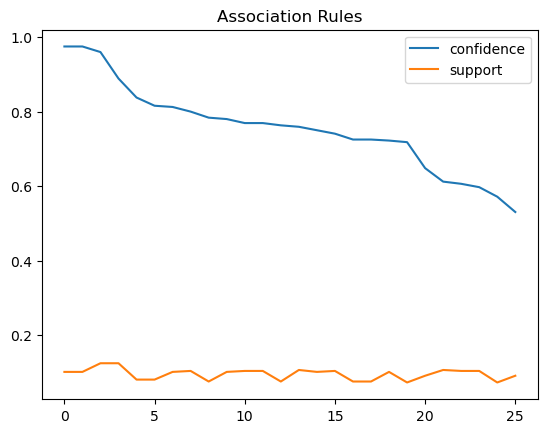

In [22]:
# insert your code here


You find below a three dimensional plot of support and confidence, where the dot size is proportional to the lift, obtained using `plot.scatter`.

You can use the parameter `s` of `scatter` and pass to it the `lift` of the rules. For a more effective display the `lift` should be transformed, for example with `display_lift = 1.8**lift`

<Axes: title={'center': 'Association Rules (dot proportional to Lift)'}, xlabel='support', ylabel='confidence'>

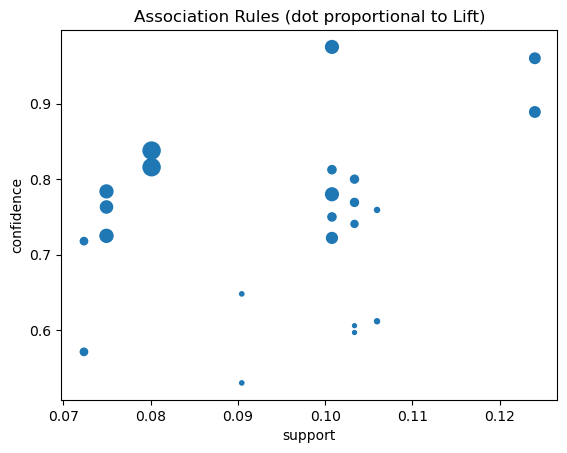

In [23]:
# insert your code here
